<a href="https://colab.research.google.com/github/rukendar/Rukendar.s/blob/main/News_Paper_7_02_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

file_path = '/content/drive/MyDrive/Assignments_excelr/NewspaperData.csv'
df = pd.read_csv(file_path)
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


from matplotlib import pyplot as plt
df['daily'].plot(kind='hist', bins=20, title='daily')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sunday'].plot(kind='hist', bins=20, title='sunday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='daily', y='sunday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['daily'].plot(kind='line', figsize=(8, 4), title='daily')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sunday'].plot(kind='line', figsize=(8, 4), title='sunday')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [3]:
df.isnull().sum()

,0
Newspaper,0
daily,0
sunday,0


In [4]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


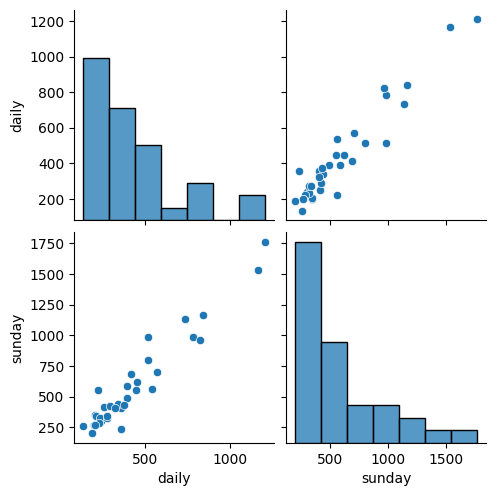

In [5]:
sns.pairplot(df)

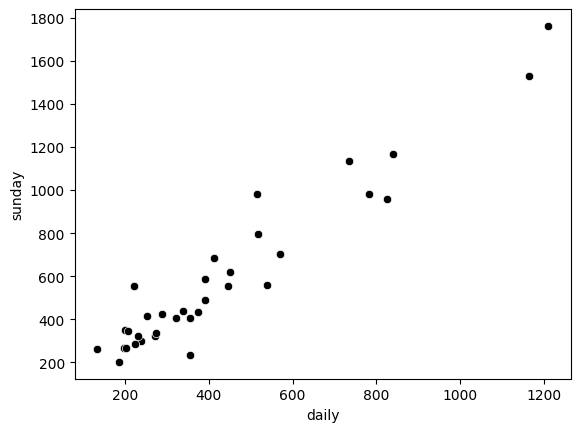

In [10]:
sns.scatterplot(x='daily', y='sunday',color="black",data=df)
plt.show()

In [31]:
import statsmodels.formula.api as smf
model = smf.ols('daily ~ sunday', data=df).fit()
model.params

,0
Intercept,25.832125
sunday,0.685265


In [19]:
model.tvalues, '\n', model.pvalues

(Intercept     1.022773
 sunday       18.934840
 dtype: float64,
 '\n',
 Intercept    3.140853e-01
 sunday       6.016802e-19
 dtype: float64)

In [26]:
import statsmodels.formula.api as smf
model1 = smf.ols('sunday ~daily', data=df).fit()
model1.params

,0
Intercept,13.835630
daily,1.339715


In [28]:
model1.tvalues, '\n', model1.pvalues

(Intercept     0.386427
 daily        18.934840
 dtype: float64,
 '\n',
 Intercept    7.017382e-01
 daily        6.016802e-19
 dtype: float64)

In [33]:
model1.rsquared,model1.rsquared_adj

(0.9180596895873295, 0.9154990548869336)

In [39]:
newdata=pd.Series([20,30])
data_pred=pd.DataFrame(newdata,columns=['sunday'])
model.predict(data_pred)

,0
0,39.537426
1,46.390076
